In [1]:
from lib.datasources import *
from lib.characterization import *
from lib.analytics import *

# Population the Complex Networks Data Base

In [2]:
loader_configs = {
    'base_folder': 'data', 
    'random_seed': 123, 
    'loader_mode': 'full'
}
SyntheticNetworks.setup(**loader_configs)
KeggMetabolicNetworks.setup(**loader_configs)

In [3]:
datapool = DataPool()
datapool.persist_fetched = False
datapool.update(n=SyntheticNetworks.all(samples_per_label=5))
datapool.update(n=KeggMetabolicNetworks.all(samples_per_label=5))


synthetic/classic


[watts]           : 100%|███████████████| 5/5 [00:01<00:00,  4.03it/s]



synthetic/scalefree


[mendes]          : 100%|███████████████| 5/5 [00:00<00:00,  9.71it/s]



kegg-metabolic/actinobacteria


[streptomyces]    : 100%|███████████████| 5/5 [00:01<00:00,  4.51it/s]



kegg-metabolic/firmicutes-bacillis


[streptococcus]   : 100%|███████████████| 5/5 [00:00<00:00, 21.22it/s]



kegg-metabolic/protist


[stramenopiles]   : 100%|███████████████| 5/5 [00:00<00:00,  6.70it/s]



kegg-metabolic/fungi


[sordariomycetes] : 100%|███████████████| 5/5 [00:01<00:00,  4.23it/s]



kegg-metabolic/plant


[monocots]        : 100%|███████████████| 5/5 [00:01<00:00,  2.64it/s]



kegg-metabolic/animals


[mammals]         : 100%|███████████████| 5/5 [00:01<00:00,  2.51it/s]



kegg-metabolic/kingdom


[protist]         : 100%|███████████████| 5/5 [00:00<00:00, 13.42it/s]


In [4]:
datapool.networks

,collection,dataset,model,N,K,p,abbr,graph,source
network_id,,,,,,,,,
0,synthetic,classic,Erdos-Renyi,1500,12.00,NaN,"ER(N=1500, K=12)_#79",<lib.containers.GraphAPI object at 0x7f1616f50...,data/synthetic/classic/erdos/erdos_n=1500_k=6_...
1,synthetic,classic,Erdos-Renyi,500,20.00,NaN,"ER(N=500, K=20)_#46",<lib.containers.GraphAPI object at 0x7f1616f50...,data/synthetic/classic/erdos/erdos_n=500_k=10_...
2,synthetic,classic,Erdos-Renyi,500,8.00,NaN,"ER(N=500, K=8)_#18",<lib.containers.GraphAPI object at 0x7f1616f50...,data/synthetic/classic/erdos/erdos_n=500_k=4_i...
3,synthetic,classic,Erdos-Renyi,1500,8.00,NaN,"ER(N=1500, K=8)_#43",<lib.containers.GraphAPI object at 0x7f1616f50...,data/synthetic/classic/erdos/erdos_n=1500_k=4_...
4,synthetic,classic,Erdos-Renyi,500,8.00,NaN,"ER(N=500, K=8)_#77",<lib.containers.GraphAPI object at 0x7f1616f50...,data/synthetic/classic/erdos/erdos_n=500_k=4_i...
...,...,...,...,...,...,...,...,...,...
170,kegg-metabolic,kingdom,protist,943,3.19,NaN,KingdProti:tcr,<lib.containers.GraphAPI object at 0x7f1616122...,data/kegg-metabolic/kingdom/graphs/protist_tcr...
171,kegg-metabolic,kingdom,protist,1235,3.28,NaN,KingdProti:dfa,<lib.containers.GraphAPI object at 0x7f1616122...,data/kegg-metabolic/kingdom/graphs/protist_dfa...
172,kegg-metabolic,kingdom,protist,925,3.21,NaN,KingdProti:lma,<lib.containers.GraphAPI object at 0x7f1616122...,data/kegg-metabolic/kingdom/graphs/protist_lma...


In [5]:
datapool.update(m=Distances.as_dataframe())
datapool.update(m=Connectivity.as_dataframe())
datapool.update(m=ClusteringAndCycles.as_dataframe())
datapool.update(m=EntropyAndEnergy.as_dataframe())
datapool.update(m=Centrality.as_dataframe())
datapool.update(m=Automata.as_dataframe())

In [6]:
for automaton in ['tstna', 'llna']:
    # automaton itself
    idx = (datapool.measures['varname']==f'{automaton}_teps').argmax()
    datapool.measures.loc[idx, 'default'].update({'num_steps': 50})
    # network descriptors
    idx = (datapool.measures['varname']==f'{automaton}_hist').argmax()
    datapool.measures.loc[idx, 'default'].update({
        'extractors': ['Es', 'BP_3', 'BP_5'], 
        'resolution': {'Es':[10,20], 'BP_3':8, 'BP_5':32},
        'BP_5': {'digits':5},
        'BP_7': {'digits':7}
    })

In [7]:
cols = [ c for c in datapool.measures.columns if c not in ['varname', 'function'] ]
datapool.measures[cols]

,name,symbol,scope,category,dependence,default
measure_id,,,,,,
0,shortest distances,d_ij,vertex pair,distances,None,None
1,shortest distances distribution,P(d_ij),distrib,distances,[shortest distances],None
2,diameter,D,graph,distances,[shortest distances distribution],None
3,average geodesic distance,l,graph,distances,[shortest distances distribution],None
4,global efficiency,E,graph,distances,[shortest distances distribution],None
5,harmonic mean of the geodesic distances,h,graph,distances,[global efficiency],None
6,vertex degree,k_i,vertex,connectivity,None,None
7,maximum degree,k_max,graph,connectivity,[vertex degree],None
8,degree distribution,P(k),distrib,connectivity,[vertex degree],None


In [8]:
datapool.save('cache', n=True, m=True)

cache/flags.dat saved in disk
cache/networks.dat saved in disk
cache/measures.dat saved in disk


In [9]:
m_mask = (datapool.measures['name'] != 'shortest distances')
datapool.update(r=datapool.evaluate(measure_subset=m_mask, log_info=True))

Network 175/175: 100%|██████████████████████| 4550/4550 [22:35<00:00,  3.36it/s]


In [10]:
datapool.save('cache', r=True)

cache/flags.dat saved in disk
cache/results.dat saved in disk


# Creating a Tabular Dataset Collection

In [11]:
from lib.analytics import *
from lib.characterization import *

In [12]:
datapool = DataPool()
datapool.load('cache', n=True, m=True, r=True)

cache/flags.dat loaded in memory
cache/networks.dat loaded in memory
cache/measures.dat loaded in memory
cache/results.dat loaded in memory


In [13]:
m_mask = (
    (datapool.measures['category'].isin(['distances','entropy and energy','centrality'])) & 
    (datapool.measures['scope']=='graph')
)
dscoll1 = Report.make(datapool, measure_subset=m_mask, header='varname', expand=True, detail=True)
display(dscoll1)

Y                                   \
            collection         dataset            label   
sample                                                    
47      kegg-metabolic  actinobacteria  corynebacterium   
48      kegg-metabolic  actinobacteria  corynebacterium   
46      kegg-metabolic  actinobacteria  corynebacterium   
45      kegg-metabolic  actinobacteria  corynebacterium   
49      kegg-metabolic  actinobacteria  corynebacterium   
...                ...             ...              ...   
15           synthetic         classic   Watts-Strogatz   
17           synthetic         classic   Watts-Strogatz   
16           synthetic         classic   Watts-Strogatz   
18           synthetic         classic   Watts-Strogatz   
19           synthetic         classic   Watts-Strogatz   

                                       X                                  \
                            network diam avg_gdist     effic hmean_gdist   
sample                                                                     
47                  ActinCoryn:camg    6  3.199388  0.332155    3.010642   
48                   ActinCoryn:cgm    6  3.259873  0.326548    3.062342   
46                   ActinCoryn:cod    6  3.193072   0.33293    3.003637   
45                   ActinCoryn:cpk    6  3.210487  0.331499      3.0166   
49                   ActinCoryn:cua    6  3.217767  0.330892    3.022134   
...                             ...  ...       ...       ...         ...   
15      WS(N=1500, K=28, p=0.1)_#14    6  3.572033  0.295711    3.381684   
17      WS(N=2000, K=16, p=0.1)_#73    8  4.812084  0.219902    4.547489   
16       WS(N=2000, K=8, p=0.1)_#80   14   7.72969  0.138962    7.196227   
18       WS(N=500, K=24, p=0.1)_#89    5  3.204512  0.336813    2.969006   
19        WS(N=500, K=8, p=0.1)_#84   12  6.193464   0.18142    5.512066   

                                                                     
       p_deg_enrg p_deg_entr q_deg_entr       avg_bc            cpd  
sample                                                               
47      11.375221   2.259933   2.975835  1124.387476  168598.630624  
48      11.193398   2.287669   2.998323  1165.464597  155765.110178  
46      11.151356   2.287944   2.976222   959.969143  104224.779559  
45      11.112865   2.305382   2.986354   990.797991  111242.290751  
49      10.964664    2.27661   2.947001   988.515152  117798.232611  
...           ...        ...        ...          ...            ...  
15      25.282286   1.897235   1.892081  1929.524667    4756.027111  
17      10.698943   1.644403   1.640853     3812.584   15570.262549  
16       3.264796   1.269328   1.268132    6723.4635   45184.302256  
18      20.077449   1.811774   1.801688      551.628    1245.863291  
19       3.263598   1.248117   1.225297     1298.866    6081.093006  

[175 rows x 13 columns]

In [14]:
m_mask = (datapool.measures['varname'] == 'llna_hist')
dscoll2 = Report.make(datapool, measure_subset=m_mask, header='varname', expand=True, detail=True)
display(dscoll2)

Y                                   \
            collection         dataset            label   
sample                                                    
47      kegg-metabolic  actinobacteria  corynebacterium   
48      kegg-metabolic  actinobacteria  corynebacterium   
46      kegg-metabolic  actinobacteria  corynebacterium   
45      kegg-metabolic  actinobacteria  corynebacterium   
49      kegg-metabolic  actinobacteria  corynebacterium   
...                ...             ...              ...   
15           synthetic         classic   Watts-Strogatz   
17           synthetic         classic   Watts-Strogatz   
16           synthetic         classic   Watts-Strogatz   
18           synthetic         classic   Watts-Strogatz   
19           synthetic         classic   Watts-Strogatz   

                                                        X  \
                            network llna_hist:[Es,10]#001   
sample                                                      
47                  ActinCoryn:camg              0.000000   
48                   ActinCoryn:cgm              0.000000   
46                   ActinCoryn:cod              0.001143   
45                   ActinCoryn:cpk              0.000000   
49                   ActinCoryn:cua              0.000000   
...                             ...                   ...   
15      WS(N=1500, K=28, p=0.1)_#14              0.000000   
17      WS(N=2000, K=16, p=0.1)_#73              0.000000   
16       WS(N=2000, K=8, p=0.1)_#80              0.004000   
18       WS(N=500, K=24, p=0.1)_#89              0.000000   
19        WS(N=500, K=8, p=0.1)_#84              0.002000   

                                                                          \
       llna_hist:[Es,10]#002 llna_hist:[Es,10]#003 llna_hist:[Es,10]#004   
sample                                                                     
47                  0.000000              0.000000               0.00000   
48                  0.000000              0.000000               0.00097   
46                  0.000000              0.001143               0.00000   
45                  0.001116              0.000000               0.00000   
49                  0.000000              0.000000               0.00000   
...                      ...                   ...                   ...   
15                  0.000000              0.000000               0.00000   
17                  0.000000              0.000000               0.00000   
16                  0.002000              0.002000               0.00300   
18                  0.000000              0.000000               0.00000   
19                  0.002000              0.000000               0.00000   

                                                    ...  \
       llna_hist:[Es,10]#005 llna_hist:[Es,10]#006  ...   
sample                                              ...   
47                  0.001957              0.004892  ...   
48                  0.001940              0.002910  ...   
46                  0.001143              0.002286  ...   
45                  0.003348              0.006696  ...   
49                  0.000000              0.005612  ...   
...                      ...                   ...  ...   
15                  0.000000              0.000000  ...   
17                  0.000000              0.000000  ...   
16                  0.006500              0.008500  ...   
18                  0.000000              0.000000  ...   
19                  0.008000              0.004000  ...   

                                                                  \
       llna_hist:std([BP_5,32])#023 llna_hist:std([BP_5,32])#024   
sample                                                             
47                         0.020943                     0.015092   
48                         0.023771                     0.013165   
46                         0.025706                     0.013984   
45                         0.019344    

# Optimizing Classifiers

In [15]:
from lib.classification import ModelSelector

import itertools as itt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import sklearn as skl

In [16]:
msel = ModelSelector([
    GaussianNB(),
    *[ KNeighborsClassifier(n_neighbors=2*k+1, weights='distance', n_jobs=4) for k in range(3) ],
    *[ DecisionTreeClassifier(
        criterion=crit, 
        max_depth=2*md+3, 
        min_samples_split=5
    ) for (crit, md) in itt.product(
        ['gini','entropy'],
        list(range(3))
    ) ],
    *[ SVC(kernel=krn, decision_function_shape='ovr') for krn in ['linear', 'rbf', 'sigmoid'] ],
    *[ SVC(kernel='poly', degree=deg+1, decision_function_shape='ovr') for deg in range(2,5) ],
    *[ MLPClassifier(
        hidden_layer_sizes=tuple([128]*n_layer), 
        activation=activ,
        solver='adam',
        learning_rate='adaptive',
        early_stopping=True
    ) for (activ, n_layer) in itt.product(
        ['relu','logistic'], 
        list(range(3))
    ) ]
])

In [17]:
list(enumerate(msel.classifiers))

[(0, GaussianNB()),
 (1, KNeighborsClassifier(n_jobs=4, n_neighbors=1, weights='distance')),
 (2, KNeighborsClassifier(n_jobs=4, n_neighbors=3, weights='distance')),
 (3, KNeighborsClassifier(n_jobs=4, weights='distance')),
 (4, DecisionTreeClassifier(max_depth=3, min_samples_split=5)),
 (5, DecisionTreeClassifier(max_depth=5, min_samples_split=5)),
 (6, DecisionTreeClassifier(max_depth=7, min_samples_split=5)),
 (7,
  DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)),
 (8,
  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
 (9,
  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5)),
 (10, SVC(kernel='linear')),
 (11, SVC()),
 (12, SVC(kernel='sigmoid')),
 (13, SVC(kernel='poly')),
 (14, SVC(degree=4, kernel='poly')),
 (15, SVC(degree=5, kernel='poly')),
 (16,
  MLPClassifier(early_stopping=True, hidden_layer_sizes=(),
                learning_rate='adaptive')),
 (17,
  MLPClassifier(early_stopping=Tr

In [20]:
def unpack_data(dscoll, dsname):
    mask = (dscoll['Y','dataset'] == dsname)
    X = dscoll.loc[mask,'X'].values
    y = dscoll.loc[mask,'Y']['label'].values
    return (X, y)

experiments = {
    'structural measures': { name: unpack_data(dscoll1, name) for name in dscoll1['Y','dataset'].unique() },
    'automata descriptors': { name: unpack_data(dscoll2, name) for name in dscoll2['Y','dataset'].unique() }
}

for name in experiments:
    datasets = experiments[name]
    msel.run_experiment(name, datasets, folds=2, reps=3)

100%|█████████████████████████████████████████| 396/396 [00:30<00:00, 13.04it/s]


In [23]:
msel.compare('accuracy', sorting_score=True, top=5)

model info                          \
            experiment              classifier   
1  structural measures                     SVC   
2  structural measures    KNeighborsClassifier   
3  structural measures    KNeighborsClassifier   
4  structural measures  DecisionTreeClassifier   
5  structural measures  DecisionTreeClassifier   

                                                                   \
                                              params global score   
1                                    kernel='linear'     0.684814   
2        n_jobs=4, n_neighbors=1, weights='distance'     0.662698   
3        n_jobs=4, n_neighbors=3, weights='distance'     0.622421   
4  criterion='entropy', max_depth=5, min_samples_...     0.619896   
5                   max_depth=5, min_samples_split=5     0.599261   

        accuracy                                                            \
  actinobacteria   animals classic scalefree firmicutes-bacillis     fungi   
1       0.866071  0.600000    0.90  0.961538            0.550000  0.350000   
2       0.866071  0.800000    0.75  1.000000            0.400000  0.300000   
3       0.866071  0.650000    0.75  1.000000            0.450000  0.300000   
4       0.562500  0.533333    0.80  0.870726            0.666667  0.500000   
5       0.610119  0.650000    0.40  0.870726            0.650000  0.583333   

                                 
    kingdom     plant   protist  
1  0.950000  0.535714  0.450000  
2  0.900000  0.598214  0.350000  
3  0.750000  0.535714  0.300000  
4  0.633333  0.645833  0.366667  
5  0.633333  0.645833  0.350000

In [25]:
for ds in msel.evaluation['dataset'].unique():
    display(msel.analyze(ds, by=['accuracy', 'balanced accuracy'], top=5, level=1))

dataset           experiment              model name  \
                                                                 
1  actinobacteria  structural measures    KNeighborsClassifier   
2  actinobacteria  structural measures    KNeighborsClassifier   
3  actinobacteria  structural measures                     SVC   
4  actinobacteria  structural measures    KNeighborsClassifier   
5  actinobacteria  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1        n_jobs=4, n_neighbors=1, weights='distance'  0.866071  0.009781   
2        n_jobs=4, n_neighbors=3, weights='distance'  0.866071  0.009781   
3                                    kernel='linear'  0.866071  0.009781   
4                       n_jobs=4, weights='distance'  0.794643  0.088027   
5  criterion='entropy', max_depth=3, min_samples_...  0.690476  0.228590   

  balanced accuracy            
               mean       std  
1          0.888889  0.000000  
2          0.888889  0.000000  
3          0.888889  0.000000  
4          0.833333  0.060858  
5          0.712963  0.220596

dataset           experiment              model name  \
                                                          
1  animals  structural measures    KNeighborsClassifier   
2  animals  structural measures              GaussianNB   
3  animals  structural measures                     SVC   
4  animals  structural measures  DecisionTreeClassifier   
5  animals  structural measures  DecisionTreeClassifier   

                                  model params accuracy            \
                                                   mean       std   
1  n_jobs=4, n_neighbors=1, weights='distance'     0.80  0.109545   
2                                                  0.70  0.109545   
3                             kernel='sigmoid'     0.70  0.109545   
4             max_depth=3, min_samples_split=5     0.65  0.054772   
5             max_depth=5, min_samples_split=5     0.65  0.054772   

  balanced accuracy            
               mean       std  
1          0.812500  0.068465  
2          0.708333  0.045644  
3          0.708333  0.091287  
4          0.687500  0.068465  
5          0.687500  0.068465

dataset           experiment              model name  \
                                                          
1  classic  structural measures                     SVC   
2  classic  structural measures  DecisionTreeClassifier   
3  classic  structural measures  DecisionTreeClassifier   
4  classic  structural measures    KNeighborsClassifier   
5  classic  structural measures    KNeighborsClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1                                    kernel='linear'  0.900000  0.109545   
2  criterion='entropy', max_depth=5, min_samples_...  0.800000  0.126491   
3  criterion='entropy', max_depth=7, min_samples_...  0.766667  0.121106   
4        n_jobs=4, n_neighbors=1, weights='distance'  0.750000  0.054772   
5        n_jobs=4, n_neighbors=3, weights='distance'  0.750000  0.054772   

  balanced accuracy            
               mean       std  
1          0.916667  0.091287  
2          0.798611  0.152335  
3          0.770833  0.146131  
4          0.770833  0.068465  
5          0.770833  0.068465

dataset           experiment            model name  \
                                                          
1  scalefree  structural measures  KNeighborsClassifier   
2  scalefree  structural measures  KNeighborsClassifier   
3  scalefree  structural measures  KNeighborsClassifier   
4  scalefree  structural measures                   SVC   
5  scalefree  structural measures                   SVC   

                                  model params  accuracy            \
                                                    mean       std   
1  n_jobs=4, n_neighbors=1, weights='distance'  1.000000  0.000000   
2  n_jobs=4, n_neighbors=3, weights='distance'  1.000000  0.000000   
3                 n_jobs=4, weights='distance'  1.000000  0.000000   
4                      degree=5, kernel='poly'  1.000000  0.000000   
5                      degree=4, kernel='poly'  0.961538  0.042133   

  balanced accuracy            
               mean       std  
1          1.000000  0.000000  
2          1.000000  0.000000  
3          1.000000  0.000000  
4          1.000000  0.000000  
5          0.966667  0.036515

dataset            experiment              model name  \
                                                                       
1  firmicutes-bacillis   structural measures  DecisionTreeClassifier   
2  firmicutes-bacillis   structural measures  DecisionTreeClassifier   
3  firmicutes-bacillis   structural measures  DecisionTreeClassifier   
4  firmicutes-bacillis   structural measures                     SVC   
5  firmicutes-bacillis  automata descriptors                     SVC   

                                        model params  accuracy            \
                                                          mean       std   
1  criterion='entropy', max_depth=5, min_samples_...  0.666667  0.081650   
2                   max_depth=5, min_samples_split=5  0.650000  0.122474   
3  criterion='entropy', max_depth=3, min_samples_...  0.600000  0.154919   
4                                   kernel='sigmoid'  0.600000  0.109545   
5                                   kernel='sigmoid'  0.600000  0.109545   

  balanced accuracy            
               mean       std  
1          0.708333  0.102062  
2          0.687500  0.153093  
3          0.645833  0.178244  
4          0.625000  0.091287  
5          0.583333  0.091287

dataset           experiment              model name  \
                                                         
1   fungi  structural measures  DecisionTreeClassifier   
2   fungi  structural measures  DecisionTreeClassifier   
3   fungi  structural measures  DecisionTreeClassifier   
4   fungi  structural measures  DecisionTreeClassifier   
5   fungi  structural measures                     SVC   

                                        model params  accuracy            \
                                                          mean       std   
1                   max_depth=5, min_samples_split=5  0.583333  0.075277   
2  criterion='entropy', max_depth=7, min_samples_...  0.516667  0.147196   
3  criterion='entropy', max_depth=5, min_samples_...  0.500000  0.154919   
4                   max_depth=7, min_samples_split=5  0.466667  0.081650   
5                            degree=5, kernel='poly'  0.450000  0.054772   

  balanced accuracy            
               mean       std  
1          0.604167  0.094097  
2          0.520833  0.183995  
3          0.500000  0.193649  
4          0.458333  0.102062  
5          0.458333  0.045644

dataset           experiment            model name  \
                                                        
1  kingdom  structural measures                   SVC   
2  kingdom  structural measures  KNeighborsClassifier   
3  kingdom  structural measures                   SVC   
4  kingdom  structural measures                   SVC   
5  kingdom  structural measures  KNeighborsClassifier   

                                  model params accuracy            \
                                                   mean       std   
1                              kernel='linear'     0.95  0.054772   
2  n_jobs=4, n_neighbors=1, weights='distance'     0.90  0.109545   
3                             kernel='sigmoid'     0.80  0.000000   
4                                                  0.80  0.000000   
5  n_jobs=4, n_neighbors=3, weights='distance'     0.75  0.164317   

  balanced accuracy                
               mean           std  
1          0.958333  4.564355e-02  
2          0.916667  9.128709e-02  
3          0.833333  8.599751e-17  
4          0.812500  2.282177e-02  
5          0.791667  1.369306e-01

dataset           experiment              model name  \
                                                         
1   plant  structural measures  DecisionTreeClassifier   
2   plant  structural measures  DecisionTreeClassifier   
3   plant  structural measures  DecisionTreeClassifier   
4   plant  structural measures  DecisionTreeClassifier   
5   plant  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1                   max_depth=7, min_samples_split=5  0.693452  0.157068   
2  criterion='entropy', max_depth=5, min_samples_...  0.645833  0.056938   
3                   max_depth=5, min_samples_split=5  0.645833  0.056938   
4  criterion='entropy', max_depth=3, min_samples_...  0.622024  0.052266   
5  criterion='entropy', max_depth=7, min_samples_...  0.622024  0.052266   

  balanced accuracy            
               mean       std  
1          0.694444  0.163865  
2          0.638889  0.068041  
3          0.638889  0.068041  
4          0.611111  0.086066  
5          0.611111  0.086066

dataset            experiment              model name  \
                                                           
1  protist   structural measures                     SVC   
2  protist  automata descriptors  DecisionTreeClassifier   
3  protist   structural measures  DecisionTreeClassifier   
4  protist   structural measures  DecisionTreeClassifier   
5  protist   structural measures           MLPClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1                                    kernel='linear'  0.450000  0.164317   
2                   max_depth=7, min_samples_split=5  0.416667  0.098319   
3                   max_depth=7, min_samples_split=5  0.400000  0.109545   
4  criterion='entropy', max_depth=7, min_samples_...  0.383333  0.098319   
5  early_stopping=True, hidden_layer_sizes=(),\n ...  0.383333  0.194079   

  balanced accuracy            
               mean       std  
1          0.458333  0.228218  
2          0.416667  0.120761  
3          0.437500  0.159752  
4          0.416667  0.144338  
5          0.354167  0.174304

In [33]:
mask = (
    (msel.evaluation['model name'] == 'DecisionTreeClassifier') &
    (msel.evaluation['dataset'] == 'classic')
)
msel.evaluation[mask].sort_values('accuracy', ascending=False).head(3)

,experiment,dataset,classifier,model name,model params,fold,repetition,fit time (s),prediction time (ms/sample),accuracy,balanced accuracy,precision micro,precision macro,recall micro,recall macro,f1 micro,f1 macro,confusion matrix
292,structural measures,classic,"DecisionTreeClassifier(criterion='entropy', ma...",DecisionTreeClassifier,"criterion='entropy', max_depth=7, min_samples_...",1,2,0.000400,0.009322,0.9,0.916667,0.9,0.916667,0.9,0.916667,0.9,0.9,"[[3, 0, 0, 0], [0, 2, 0, 0], [0, 1, 2, 0], [0,..."
291,structural measures,classic,"DecisionTreeClassifier(criterion='entropy', ma...",DecisionTreeClassifier,"criterion='entropy', max_depth=7, min_samples_...",1,1,0.000345,0.008368,0.9,0.916667,0.9,0.916667,0.9,0.916667,0.9,0.9,"[[3, 0, 0, 0], [0, 2, 0, 0], [0, 1, 2, 0], [0,..."
290,structural measures,classic,"DecisionTreeClassifier(criterion='entropy', ma...",DecisionTreeClassifier,"criterion='entropy', max_depth=5, min_samples_...",1,3,0.000344,0.008440,0.9,0.916667,0.9,0.916667,0.9,0.916667,0.9,0.9,"[[3, 0, 0, 0], [0, 2, 0, 0], [0, 1, 2, 0], [0,..."


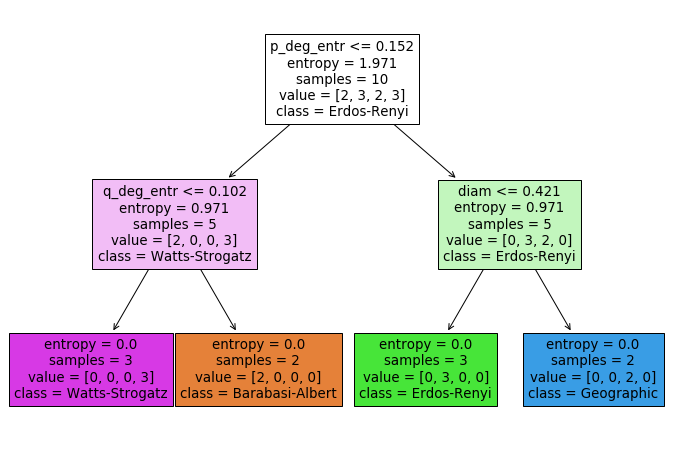

In [37]:
plt.figure(figsize=(12,8))
skl.tree.plot_tree(
    decision_tree=msel.evaluation.loc[292, 'classifier'], 
    feature_names=dscoll1['X'].columns, 
    class_names=dscoll1[ (dscoll1['Y','dataset'] == 'classic') ]['Y','label'].unique(),
    filled=True
)
plt.show()